In [8]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [35]:
f = 3.0
a = 2*np.pi*f/np.sqrt(2)
nu = 3.0

def f(t, x):
    return np.array([
        x[1],  # dx/dt
        -x[0]**3 + a**2 * x[0] - nu*x[1]  # d2x/dt2
    ])

def jac(t, x):
    return np.array([
        [0, 1.0],
        [-3*x[0]**2 + a**2, -nu]
    ])

In [60]:
t_start = 0.0
t_end = 6.0
h = 0.01

In [61]:
t_grid = np.arange(t_start, t_end, h)


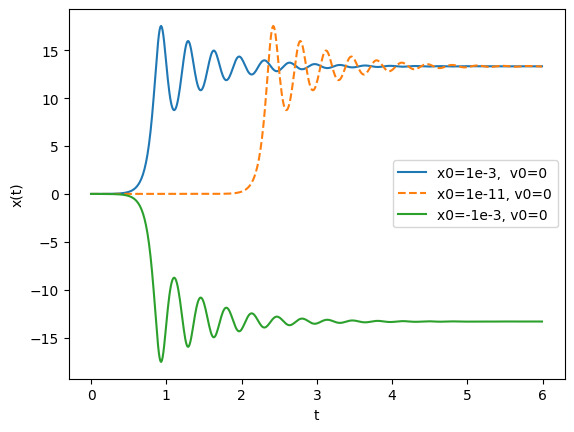

In [65]:
def get_soln(x0):
    ode_integrator = integrate.ode(f=f, jac=jac)
    ode_integrator.set_integrator('vode', atol=1e-10, rtol=1e-9, nsteps=5000)
    
    x_init = np.array([x0, 0.0])
    x_soln = np.zeros_like(t_grid)
    ode_integrator.set_initial_value(x_init, 0)
    for i, t in enumerate(t_grid[1:]):
        x_new = ode_integrator.integrate(t)
        try:
            assert ode_integrator.successful()
        except AssertionError:
            print(f'Integrator failed at step {i+1}, integrating from {t_grid[i]} to {t_grid[i+1]}')
        x_soln[i+1] = x_new[0]
    return x_soln

x_soln1 = get_soln(x0=1e-3)
x_soln2 = get_soln(x0=1e-11)
x_soln3 = get_soln(x0=-1e-3)


fig, ax = plt.subplots()
ax.plot(t_grid, x_soln1, ls='-', label='x0=1e-3,  v0=0')
ax.plot(t_grid, x_soln2, ls='--', label='x0=1e-11, v0=0')
ax.plot(t_grid, x_soln3, ls='-', label='x0=-1e-3, v0=0')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.legend()
plt.show()

fig.savefig('double_well.png')

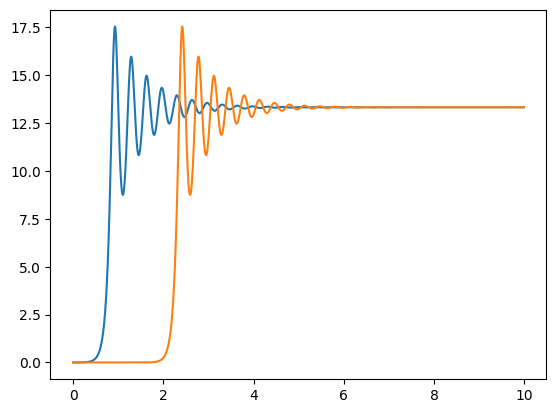

In [58]:
np.log(1e8)/a

np.float64(1.382036619041778)